In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split

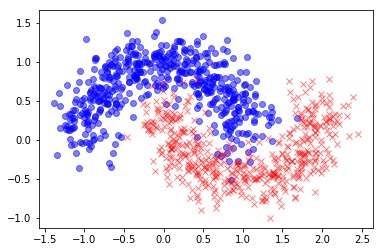

In [100]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha=0.5)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha=0.5)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense

In [103]:
def buildShallow(X, y):
    model = Sequential()
    model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
    model.compile(Adam(lr=0.05), "binary_crossentropy", metrics=['accuracy'])
    model.fit(X, y, epochs = 200, verbose = 0)
    return model

In [104]:
shallow = buildShallow(X_train, y_train)

In [105]:
results = shallow.evaluate(X_test, y_test)
results

 32/300 [==>...........................] - ETA: 1s

[0.36149914026260377, 0.82333333412806198]

In [106]:
def plotDecisionBoundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize = (12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    
    plt.legend(['0', '1'])

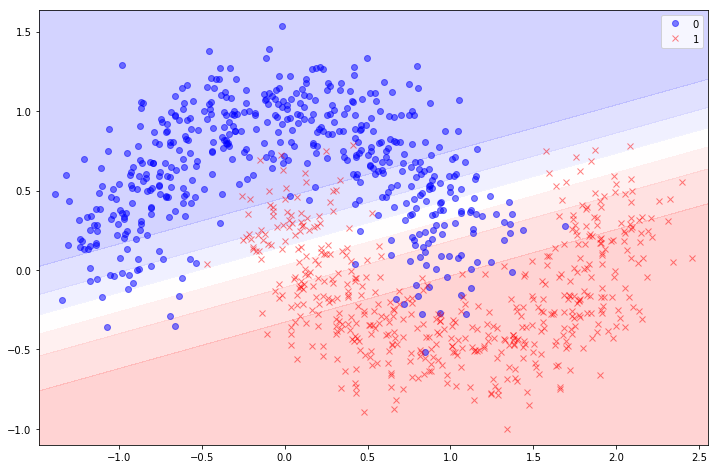

In [107]:
plotDecisionBoundary(shallow, X, y)

In [168]:
def buildDeep(X, y):
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation="tanh"))
    model.add(Dense(2, activation="tanh"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(SGD(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
    model.fit(X, y, epochs=500, verbose = 0)
    return model

In [169]:
deep = buildDeep(X_train, y_train)
deep.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 2s

[0.11529438865681489, 0.95333333333333337]

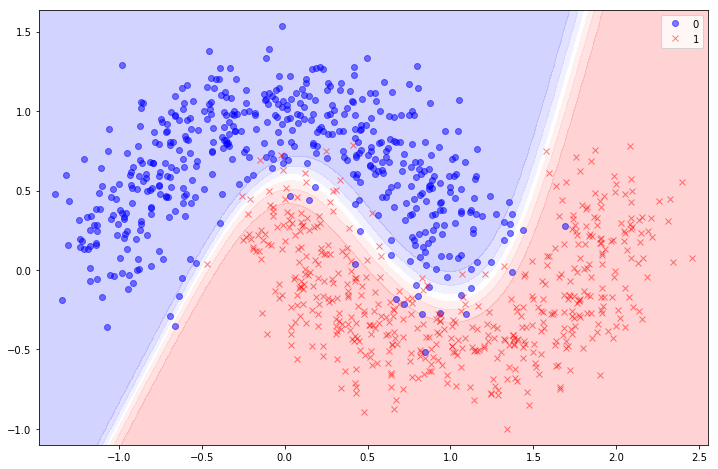

In [170]:
plotDecisionBoundary(deep, X, y)